In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import copy
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC, SVR
from IPython.display import display
from scipy.stats.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import VarianceThreshold, chi2, RFE, SelectKBest, f_classif
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle\columns.csv
kaggle\responses.csv


In [11]:
columns  = pd.read_csv("kaggle/columns.csv")

responses = pd.read_csv("kaggle/responses.csv")

In [12]:
responses.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   

   Number of siblings  Gender  Left - right handed                Education  \
0                 1.0  female         right handed  college/bachelor degree   
1                 2.0  female         right handed  college/bachelor degree   
2                 2.0  female         right handed         secondary school   
3                 1.0  female         right handed  college/bachelor degree   
4                 1.0  female         right handed         secondary school   

   Only child  Village - town  House - block of flats  
0          no         village          block of flats  
1          no            city          block of flats  
2          no            city          block of flats  
3         yes            city          house/bungalow  
4          no         village          house/bungalow  

[5 rows x 150 columns]

# Preprocessing


In [144]:
#Transformator imputacyjny do uzupełniania brakujących wartości.
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
responses = responses.replace([np.inf, -np.inf], np.nan).dropna()
count = np.isnan(scaledData).values.sum()
print("It contains " + str(count) + " infinite values")

music = responses.iloc[:, 0:19]
movies = responses.iloc[:, 19:31]
phobias = responses.iloc[:, 63:73]
interests = responses.iloc[:, 31:63]
health = responses.iloc[:, 73:76]
personal = responses.iloc[:, 76:133]
information = responses.iloc[:, 140:150]
spendings = responses.iloc[:, 133:140]

#print(music)
#print(movies)
#print(phobias)
#print(interests)
#print(health)
#print(personal)
#print(information)
#print(spendings)


It contains 15 infinite values


In [167]:
# Processing  personal
for x in personal["Lying"]:
    if x == "never":
        personal.replace(x, 1.0, inplace=True)
    elif x == "only to avoid hurting someone":
        personal.replace(x, 2.0, inplace=True)
    elif x == "sometimes":
        personal.replace(x, 3.0, inplace=True)
    elif x == "everytime it suits me":
        personal.replace(x, 4.0, inplace=True)
    elif x == "Nan":
        personal.replace(x, np.nan, inplace=True)
    elif x == "nan":
        personal.replace(x, np.nan, inplace=True)

for x in personal["Punctuality"]:
    if x == "i am often early":
        personal.replace(x, 3.0, inplace=True)
    elif x == "i am always on time":
        personal.replace(x, 2.0, inplace=True)
    elif x == "i am often running late":
        personal.replace(x, 1.0, inplace=True)
    elif x == "Nan":
        personal.replace(x, np.nan, inplace=True)
    elif x == "nan":
        personal.replace(x, np.nan, inplace=True)

for x in personal["Internet usage"]:
    if x == "most of the day":
        personal.replace(x, 4.0, inplace=True)
    elif x == "few hours a day":
        personal.replace(x, 3.0, inplace=True)
    elif x == "less than an hour a day":
        personal.replace(x, 2.0, inplace=True)
    elif x == "no time at all":
        personal.replace(x, 1.0, inplace=True)
    elif x == "Nan":
        personal.replace(x, np.nan, inplace=True)
    elif x == "nan":
        personal.replace(x, np.nan, inplace=True)

# podmiana stringów na numpy NaNs
personal = personal.replace("NaN", np.nan)
personal = personal.replace("nan", np.nan)


imp.fit(personal)
personal_data = imp.transform(personal)

d = personal_data[:, :]
ind = []
for x in range(len(personal_data)):
    ind.append(x)
c = personal.columns.tolist()
personal = pd.DataFrame(data=d, index=ind, columns=c)



It contains 0 Nan values


In [168]:
for x in health["Smoking"]:
    if x == "current smoker":
        health.replace(x, 1.0, inplace=True)
    elif x == "former smoker":
        health.replace(x, 2.0, inplace=True)
    elif x == "tried smoking":
        health.replace(x, 3.0, inplace=True)
    elif x == "never smoked":
        health.replace(x, 4.0, inplace=True)
    elif x == "Nan":
        health.replace(x, np.nan, inplace=True)
    elif x == "nan":
        health.replace(x, np.nan, inplace=True)
for x in health["Alcohol"]:
    if x == "drink a lot":
        health.replace(x, 1.0, inplace=True)
    elif x == "social drinker":
        health.replace(x, 2.0, inplace=True)
    elif x == "never":
        health.replace(x, 3.0, inplace=True)
    elif x == "Nan":
        health.replace(x, np.nan, inplace=True)
    elif x == "nan":
        health.replace(x, np.nan, inplace=True)
health = health.replace("NaN", np.nan)
health = health.replace("nan", np.nan)

imp.fit(health)
healthData = imp.transform(health)
d = healthData[:, :]
ind = []
for x in range(len(healthData)):
    ind.append(x)
c = health.columns.tolist()
health = pd.DataFrame(data=d, index=ind, columns=c)


It contains 0 Nan values


In [147]:
for x in information["Gender"]:
    if x == "female":
        information.replace(x, 2.0, inplace=True)
    elif x == "male":
        information.replace(x, 1.0, inplace=True)
    elif x == "Nan":
        information.replace(x, np.nan, inplace=True)
    elif x == "nan":
        information.replace(x, np.nan, inplace=True)
for x in information["Left - right handed"]:
    if x == "right handed":
        information.replace(x, 1.0, inplace=True)
    elif x == "left handed":
        information.replace(x, 2.0, inplace=True)
    elif x == "Nan":
        information.replace(x, np.nan, inplace=True)
    elif x == "nan":
        information.replace(x, np.nan, inplace=True)
for x in information["Education"]:
    if x == "doctorate degree":
        information.replace(x, 6.0, inplace=True)
    elif x == "masters degree":
        information.replace(x, 5.0, inplace=True)
    elif x == "college/bachelor degree":
         information.replace(x, 4.0, inplace=True)
    elif x == "secondary school":
        information.replace(x, 3.0, inplace=True)
    elif x == "primary school":
        information.replace(x, 2.0, inplace=True)
    elif x == "currently a primary school pupil":
        information.replace(x, 1.0, inplace=True)
    elif x == "Nan":
        information.replace(x, np.nan, inplace=True)
    elif x == "nan":
        information.replace(x, np.nan, inplace=True)
for x in information["Only child"]:
    if x == "yes":
        information.replace(x, 1.0, inplace=True)
    elif x == "no":
        information.replace(x, 2.0, inplace=True)
    elif x == "Nan":
        information.replace(x, np.nan, inplace=True)
    elif x == "nan":
        information.replace(x, np.nan, inplace=True)
for x in information["Village - town"]:
    if x == "village":
        information["Village - town"].replace(x, 1.0, inplace=True)
    elif x == "city":
        information["Village - town"].replace(x, 2.0, inplace=True)
    elif x == "Nan":
        information.replace(x, np.nan, inplace=True)
    elif x == "nan":
        information.replace(x, np.nan, inplace=True)
for x in information["House - block of flats"]:
    if x == "block of flats":
        information["House - block of flats"].replace(x, 1, inplace=True)
    elif x == "house/bungalow":
        information["House - block of flats"].replace(x, 2, inplace=True)
    elif x == "Nan":
        information.replace(x, np.nan, inplace=True)
    elif x == "nan":
        information.replace(x, np.nan, inplace=True)
information = information.replace("nan", np.nan)
information = information.replace("NaN", np.nan)

imp.fit(information)
informationData = imp.transform(information)
d = informationData[:, :]
ind = []
for x in range(len(informationData)):
    ind.append(x)
c = information.columns.tolist()
information = pd.DataFrame(data=d, index=ind, columns=c)


In [148]:
music = music.replace("nan", np.nan)
music = music.replace("NaN", np.nan)

imp.fit(music)
musicData = imp.transform(music)
d = musicData[:, :]
ind = []
for x in range(len(musicData)):
    ind.append(x)
c = music.columns.tolist()
music = pd.DataFrame(data=d, index=ind, columns=c)

In [149]:
movies = movies.replace("nan", np.nan)
movies = movies.replace("NaN", np.nan)

imp.fit(movies)
moviesData = imp.transform(movies)
d = moviesData[:, :]
ind = []
for x in range(len(moviesData)):
    ind.append(x)
c = movies.columns.tolist()
movies = pd.DataFrame(data=d, index=ind, columns=c)

In [150]:
phobias = phobias.replace("nan", np.nan)
phobias = phobias.replace("NaN", np.nan)

imp.fit(phobias)
phobiasData = imp.transform(phobias)
d = phobiasData[:, :]
ind = []
for x in range(len(phobiasData)):
    ind.append(x)
c = phobias.columns.tolist()
phobias = pd.DataFrame(data=d, index=ind, columns=c)

In [152]:
interests = interests.replace("nan", np.nan)
interests = interests.replace("NaN", np.nan)


imp.fit(interests)
interestsData = imp.transform(interests)
d = interestsData[:, :]
ind = []
for x in range(len(interestsData)):
    ind.append(x)
c = interests.columns.tolist()
interests = pd.DataFrame(data=d, index=ind, columns=c) 

In [169]:
# Processing spendings
spendings = spendings.replace("nan", np.nan)
spendings = spendings.replace("NaN", np.nan)

imp.fit(spendings)
spendingsData = imp.transform(spendings)
d = spendingsData[:, :]
ind = []
for x in range(len(spendingsData)):
    ind.append(x)
c = spendings.columns.tolist()
spendings = pd.DataFrame(data=d, index=ind, columns=c)



It contains 0 Nan values


In [170]:
filledData = music.join(movies.join(phobias.join(interests.join(health.join(personal.join(information.join(spendings)))))))

In [171]:
filledData.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    4.0   3.0      2.0              4.0   
4    5.0                       3.0    2.0   3.0      2.0              3.0   

   Musical  Pop  Rock  Metal or Hardrock  ...  Only child  Village - town  \
0      1.0  5.0   5.0                1.0  ...         2.0             1.0   
1      2.0  3.0   5.0                4.0  ...         2.0             2.0   
2      5.0  3.0   5.0                3.0  ...         2.0             2.0   
3      3.0  5.0   3.0                1.0  ...         2.0             1.0   
4      3.0  2.0   5.0                5.0  ...         2.0             2.0   

   House - block of flats  Finances  Shopping centres  Branded clothing  \
0                     1.0       3.0               4.0               5.0   
1                     1.0       3.0               4.0               1.0   
2                     1.0       2.0               4.0               1.0   
3                     2.0       4.0               3.0               4.0   
4                     1.0       2.0               3.0               3.0   

   Entertainment spending  Spending on looks  Spending on gadgets  \
0                     3.0                3.0                  1.0   
1                     4.0                2.0                  5.0   
2                     4.0                3.0                  4.0   
3                     3.0                3.0                  2.0   
4                     3.0                1.0                  4.0   

   Spending on healthy eating  
0                         3.0  
1                         2.0  
2                         2.0  
3                         4.0  
4                         4.0  

[5 rows x 150 columns]

In [172]:
count = np.isnan(filledData).values.sum()
print("It contains " + str(count) + " Nan values")


It contains 0 Nan values


# Normalizacja/skalowanie danych

In [173]:
scaler = StandardScaler().fit(filledData)
scaledDataarray = scaler.transform(filledData)
if type(filledData) is np.ndarray:
    scaledData = scaledDataarray
else:
    d = scaledDataarray[:, :]
    ind = []
    for x in range(len(filledData)):
        ind.append(x)
    c = filledData.columns.tolist()
    scaledData = pd.DataFrame(data=d, index=ind, columns=c)

In [174]:
scaledData.head()

Music  Slow songs or fast songs     Dance      Folk   Country  \
0  0.399471                 -0.371273 -0.914900 -1.128973 -0.110254   
1 -1.283301                  0.886205 -0.914900 -1.128973 -1.050900   
2  0.399471                  2.143683 -0.914900 -0.235865  0.830393   
3  0.399471                 -0.371273  0.781503  0.657243 -0.110254   
4  0.399471                 -0.371273 -0.914900  0.657243 -0.110254   

   Classical music   Musical       Pop      Rock  Metal or Hardrock  ...  \
0        -0.790021 -1.374236  1.329497  1.052115          -0.970806  ...   
1        -1.594363 -0.593262 -0.387133  1.052115           1.179216  ...   
2         0.818662  1.749660 -0.387133  1.052115           0.462542  ...   
3         0.818662  0.187712  1.329497 -0.683810          -0.970806  ...   
4         0.014321  0.187712 -1.245449  1.052115           1.895889  ...   

   Only child  Village - town  House - block of flats  Finances  \
0     0.54649       -1.607827               -0.794960 -0.039945   
1     0.54649        0.621958               -0.794960 -0.039945   
2     0.54649        0.621958               -0.794960 -0.908435   
3     0.54649       -1.607827                1.257925  0.828544   
4     0.54649        0.621958               -0.794960 -0.908435   

   Shopping centres  Branded clothing  Entertainment spending  \
0          0.568648          1.512313               -0.162213   
1          0.568648         -1.553248                0.685320   
2          0.568648         -1.553248                0.685320   
3         -0.197889          0.745923               -0.162213   
4         -0.197889         -0.020467               -0.162213   

   Spending on looks  Spending on gadgets  Spending on healthy eating  
0          -0.079867            -1.425191                   -0.478470  
1          -0.908023             1.656056                   -1.407831  
2          -0.079867             0.885744                   -1.407831  
3          -0.079867            -0.654879                    0.450892  
4          -1.736180             0.885744                    0.450892  

[5 rows x 150 columns]

# Korelacja cech

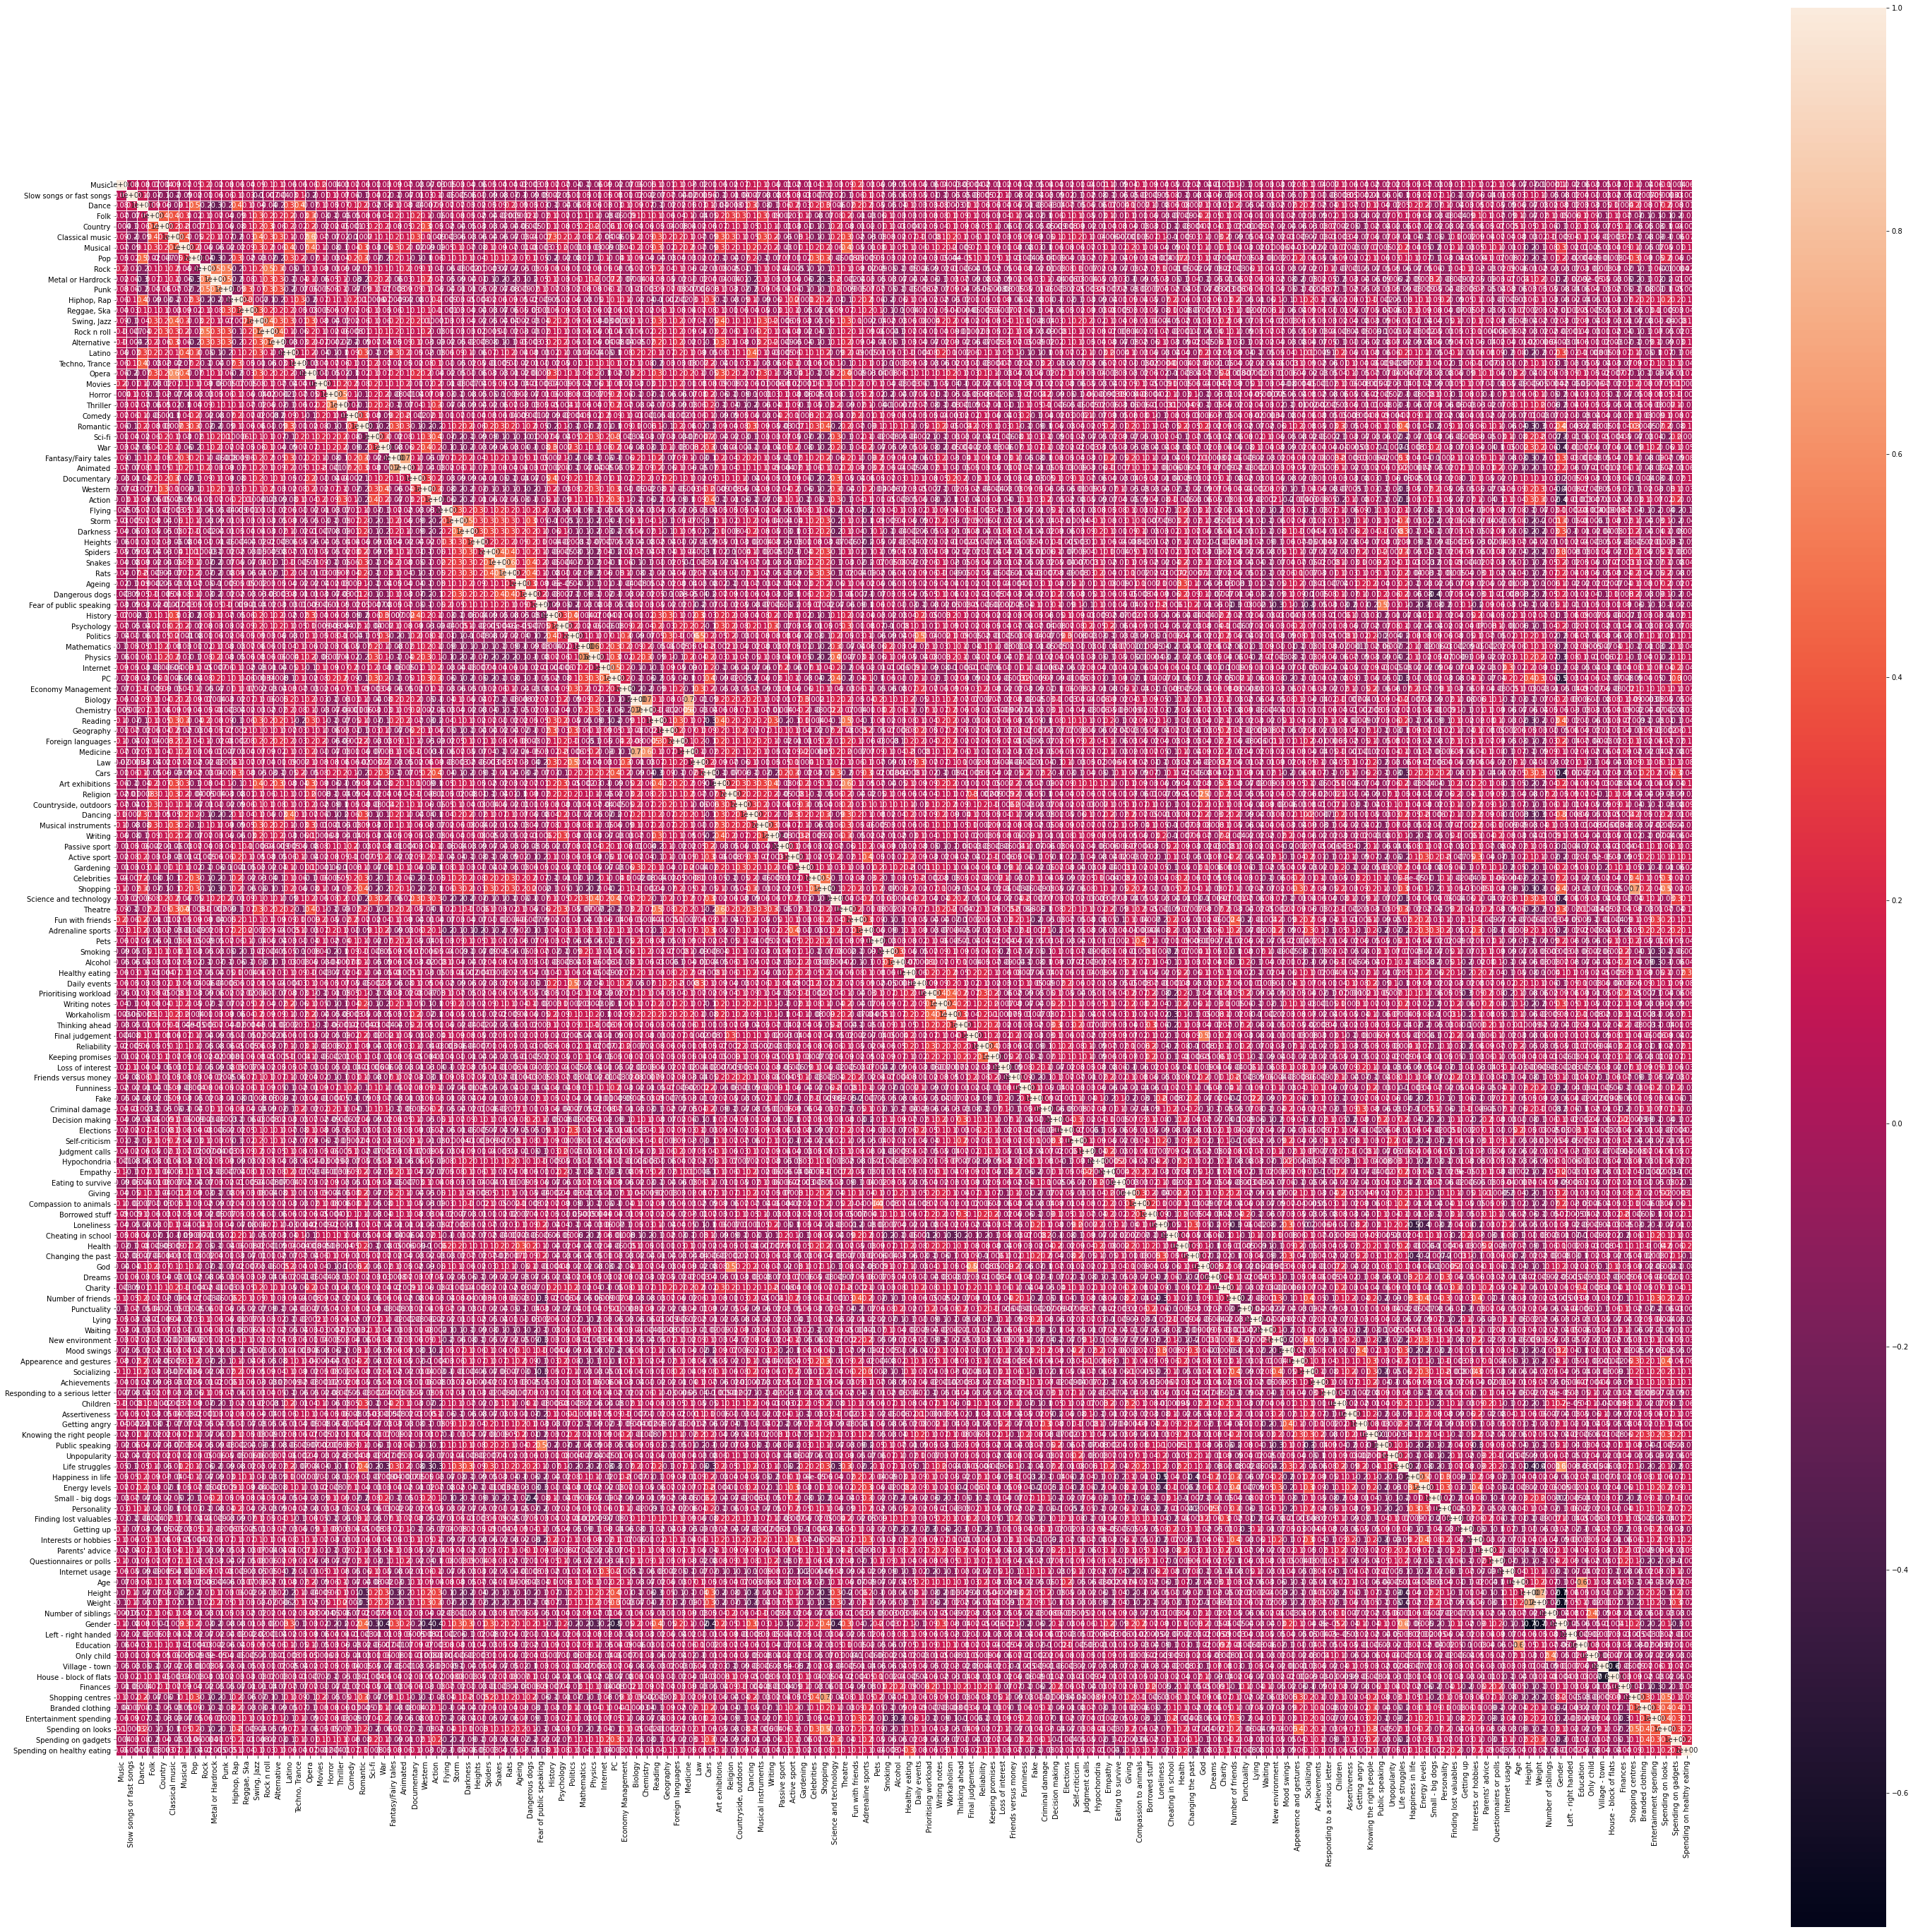

In [175]:
import matplotlib.pyplot as plot

relations = filledData.corr()
plot.figure(figsize=(50, 50)) # size of heat map
Ts = sns.heatmap(relations, annot=True,linewidths=1.0, fmt="0.00", square=True)

multicollinearity = (relations.where(np.triu(np.ones(relations.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

In [176]:
multicollinearity.head(n=15)

Height               Weight               0.729430
Biology              Medicine             0.719063
Fantasy/Fairy tales  Animated             0.709269
Biology              Chemistry            0.679350
Shopping             Shopping centres     0.658652
Age                  Education            0.617890
Mathematics          Physics              0.611750
Chemistry            Medicine             0.602294
Classical music      Opera                0.599296
Life struggles       Gender               0.582642
Art exhibitions      Theatre              0.567726
Snakes               Rats                 0.565762
Rock                 Metal or Hardrock    0.533176
Horror               Thriller             0.530744
Metal or Hardrock    Punk                 0.529328
dtype: float64

In [177]:
multicollinearity.tail(n=15)
#płeć jest bardzo skorelowana z wieloma cechami 

Changing the past       Happiness in life        -0.350884
Loneliness              Energy levels            -0.358408
Western                 Gender                   -0.372718
Dangerous dogs          Small - big dogs         -0.385346
Life struggles          Weight                   -0.392175
Science and technology  Gender                   -0.394703
War                     Gender                   -0.403009
Life struggles          Height                   -0.409165
Action                  Gender                   -0.414126
Cars                    Gender                   -0.447671
Loneliness              Happiness in life        -0.467836
PC                      Gender                   -0.479707
Village - town          House - block of flats   -0.592213
Weight                  Gender                   -0.651884
Height                  Gender                   -0.720144
dtype: float64

# Feature Engineering

In [1]:
def correlationCalculation(targetVariable, featureVariables, features):
    columns = [] 
    values = [] 

    for x in features:
        if x is not None:
            columns.append(x)
            c = np.corrcoef(featureVariables[x], featureVariables['Empathy'])
            absC = abs(c) 
            values.append(absC[0,1])
    corrValues = pd.DataFrame()
    dataDict = {'features': columns, 'correlation_values': values}
    corrValues = pd.DataFrame(dataDict)
    sortedCorrValues = corrValues.sort_values(by="correlation_values")
    # Plot the graph to show the features with their correlation values
    figure, ax = plt.subplots(figsize=(15, 45), squeeze=True)
    ax.set_title("Correlation Coefficients of Features")
    sns.barplot(x=sortedCorrValues.correlation_values, y=sortedCorrValues['features'], ax=ax)
    ax.set_ylabel("Corr Coefficients")
    plt.show()
    return sortedCorrValues

In [2]:
targetVariable = filledData['Empathy'].to_frame()
columns = []

for x in filledData.columns:
    if x !='Empathy':
        columns.append(x)

correlations = correlationCalculation(targetVariable, filledData, columns)

NameError: name 'filledData' is not defined

importantFeatures = correlations.sort_values(by="correlation_values", ascending=True).tail(20)
print(importantFeatures)

In [194]:
finalColumnsList = []
for x in importantFeatures['features']:
    finalColumnsList.append(x)

df = pd.DataFrame() # Final prepared dataset for modelling
df = filledData[finalColumnsList[0]].to_frame()
for x in range(1, len(finalColumnsList)):
    df = df.join(filledData[finalColumnsList[x]].to_frame())
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Achievements           674 non-null    float64
 1   Writing notes          674 non-null    float64
 2   Cars                   674 non-null    float64
 3   Reading                674 non-null    float64
 4   Fake                   674 non-null    float64
 5   Weight                 674 non-null    float64
 6   Borrowed stuff         674 non-null    float64
 7   Theatre                674 non-null    float64
 8   Giving                 674 non-null    float64
 9   Dancing                674 non-null    float64
 10  Friends versus money   674 non-null    float64
 11  Romantic               674 non-null    float64
 12  Compassion to animals  674 non-null    float64
 13  Psychology             674 non-null    float64
 14  Latino                 674 non-null    float64
 15  Childr

In [196]:
df.describe()

Achievements  Writing notes        Cars     Reading        Fake  \
count    674.000000     674.000000  674.000000  674.000000  674.000000   
mean       3.005935       3.035608    2.642433    3.203264    2.106825   
std        0.912173       1.443922    1.414648    1.495487    1.038851   
min        1.000000       1.000000    1.000000    1.000000    1.000000   
25%        2.250000       2.000000    1.000000    2.000000    1.000000   
50%        3.000000       3.000000    2.000000    3.000000    2.000000   
75%        4.000000       4.000000    4.000000    5.000000    3.000000   
max        5.000000       5.000000    5.000000    5.000000    5.000000   

           Weight  Borrowed stuff     Theatre      Giving    Dancing  \
count  674.000000      674.000000  674.000000  674.000000  674.00000   
mean    66.117211        4.065282    3.026706    2.878338    2.39911   
std     13.900289        1.047978    1.331702    1.308348    1.42866   
min     41.000000        1.000000    1.000000    1.000000    1.00000   
25%     55.000000        4.000000    2.000000    2.000000    1.00000   
50%     63.000000        4.000000    3.000000    3.000000    2.00000   
75%     75.000000        5.000000    4.000000    4.000000    3.00000   
max    150.000000        5.000000    5.000000    5.000000    5.00000   

       Friends versus money    Romantic  Compassion to animals  Psychology  \
count            674.000000  674.000000             674.000000  674.000000   
mean               3.765579    3.473294               3.994065    3.139466   
std                1.109838    1.203029               1.156400    1.246028   
min                1.000000    1.000000               1.000000    1.000000   
25%                3.000000    3.000000               3.000000    2.000000   
50%                4.000000    4.000000               4.000000    3.000000   
75%                5.000000    4.750000               5.000000    4.000000   
max                5.000000    5.000000               5.000000    5.000000   

           Latino    Children  Fantasy/Fairy tales      Gender  \
count  674.000000  674.000000           674.000000  674.000000   
mean     2.813056    3.587537             3.778932    1.596439   
std      1.318767    1.133926             1.180614    0.490976   
min      1.000000    1.000000             1.000000    1.000000   
25%      2.000000    3.000000             3.000000    1.000000   
50%      3.000000    4.000000             4.000000    2.000000   
75%      4.000000    5.000000             5.000000    2.000000   
max      5.000000    5.000000             5.000000    2.000000   

       Life struggles  Judgment calls  
count      674.000000      674.000000  
mean         3.013353        4.007418  
std          1.384954        0.957463  
min          1.000000        1.000000  
25%          2.000000        3.000000  
50%          3.000000        4.000000  
75%          4.000000        5.000000  
max          5.000000        5.000000